In [8]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [9]:
ls

cy_grape_fid_error_timeslices_10.hdf5
cy_grape_fid_error_timeslices_2.hdf5
cy_grape_fid_error_timeslices_4.hdf5
cy_grape_fid_error_timeslices_8.hdf5
Fig_grape_crab_vs_pop.pdf
Fig_grape_vs_pop.pdf
LIN_qutip_opt_results_timeslices_10.hdf5
LIN_qutip_opt_results_timeslices_2.hdf5
LIN_qutip_opt_results_timeslices_4.hdf5
LIN_qutip_opt_results_timeslices_8.hdf5
plots-Copy1.ipynb
plots.ipynb
pulseoptim_fid_error_timeslices_10.hdf5
pulseoptim_fid_error_timeslices_2.hdf5
pulseoptim_fid_error_timeslices_4.hdf5
pulseoptim_fid_error_timeslices_8.hdf5
Quantum_optimal_control_GRAPE_methods.ipynb
results_PiecewiseConst.hdf5
RND_qutip_opt_results_timeslices_10.hdf5
RND_qutip_opt_results_timeslices_2.hdf5
RND_qutip_opt_results_timeslices_4.hdf5
RND_qutip_opt_results_timeslices_8.hdf5
SINE_qutip_opt_results_timeslices_10.hdf5
SINE_qutip_opt_results_timeslices_2.hdf5
SINE_qutip_opt_results_timeslices_4.hdf5
SINE_qutip_opt_results_timeslices_8.hdf5
ZERO_qutip_opt_results_timeslices_10.hdf5
ZERO_qutip_opt_r

## Load data

In [12]:
# Load data from Qutip simulations
        
# Define time slice configurations to analyze
timeslices = [2, 4, 8, 10,]

# Initialize containers for fidelity errors
cy_grape_fid_error = []
pulseoptim_fid_error = []

# Loop through each time slice configuration
for n_ts in timeslices:
    
    # Generate filenames for different initial pulse conditions
    filenames = [
        f"{cond}_qutip_opt_results_timeslices_{n_ts}.hdf5" for cond in ["ZERO", "SINE", "LIN", "RND"]
    ]
    
    # Temporary storage for current timeslice data
    cy_grape_data = []
    pulseoptim_data = []

    # Load fidelity errors from each condition file
    for fname in filenames:
        with h5py.File(fname, 'r') as f:
            pulseoptim_data.append(
                f["pulseoptim_fid_error"][...]  # CRAB method results
            )
            cy_grape_data.append(
                f["cy_grape_fid_error"][...]    # GRAPE method results
            )

    # Combine all conditions for current timeslice
    cy_grape_fid_error.append(
        np.hstack(cy_grape_data)
    )
    pulseoptim_fid_error.append(
        np.hstack(pulseoptim_data)
    )

# Load QCPOP benchmark results
with h5py.File('../results_PiecewiseConst.hdf5', 'r') as f:
    pop_fid_error = 1 - f['f_PSU'][...]  # Convert fidelity to error

## Plot

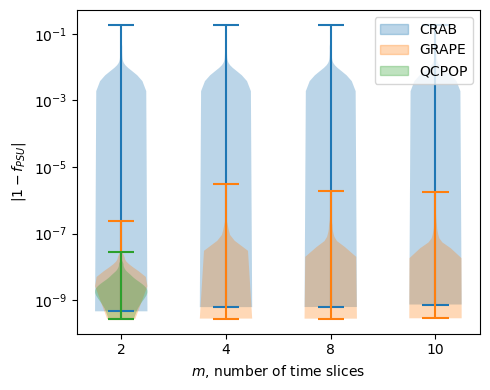

In [14]:
import matplotlib.patches as mpatches

# Create figure
plt.figure(figsize=(5, 4))

# Helper function to track legend labels
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# Create violin plots for each optimization method

# CRAB results
add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_fid_error]), "CRAB")


# GRAPE results
add_label(plt.violinplot([np.abs(_)  for _ in cy_grape_fid_error]), "GRAPE")    

# QCPOP results
add_label(plt.violinplot(pop_fid_error), "QCPOP")

# Format plot
plt.yscale('log')  # Log scale for better visibility of small errors

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("$m$, number of time slices")

plt.ylabel("$|1 - f_{PSU}|$")  # Absolute fidelity error

# Add legend in top-right corner
plt.legend(*zip(*labels), loc=1)

plt.tight_layout()

# Save and display
plt.savefig("Fig_grape_crab_vs_pop.pdf")
plt.show()